In [65]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

# PCA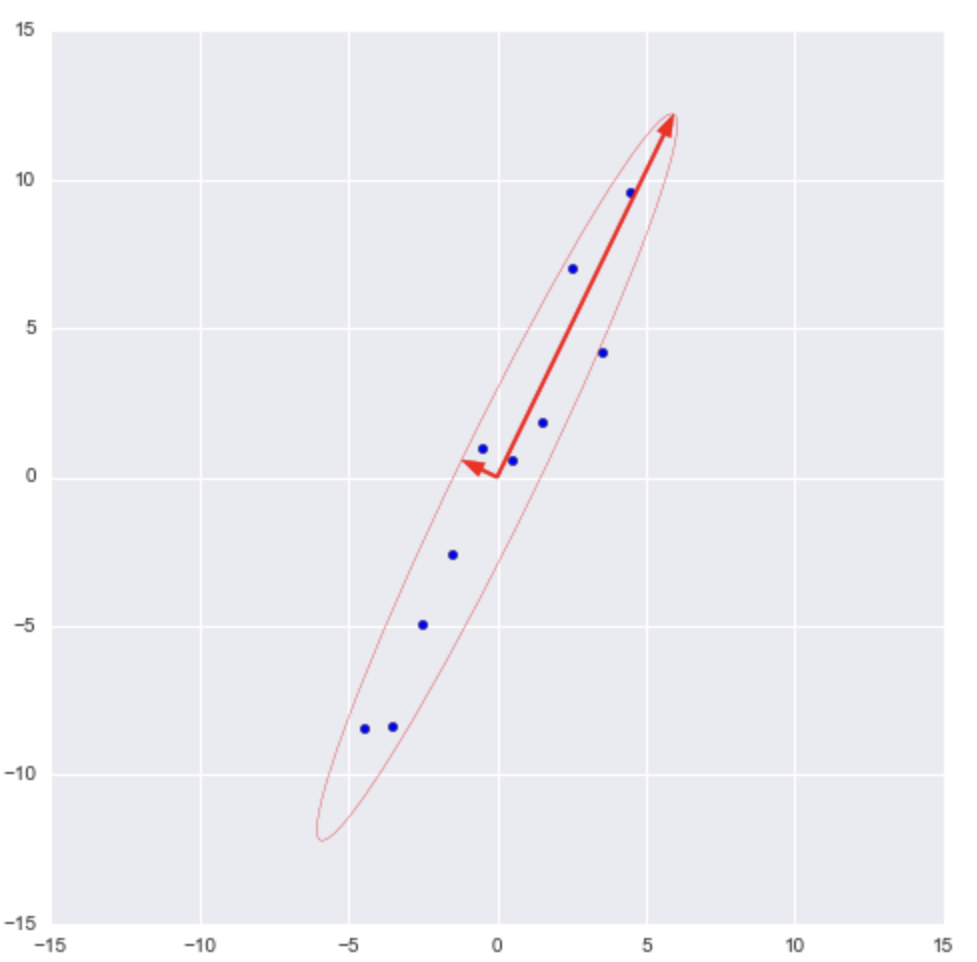

Стандартизация данных\
Вычисление матрицы ковариации: \
cov(X,Y) = M(XY) - M(X)M(Y)\
Вычисление собственных значений и собственных векторов: Собственные значения  дисперсия переменной, а собственные векторы - направления максимальной изменчивости в данных.\
Далее остается только отсортировать данные по убыванию дисперсии и проецировать на оси с максимальными собственными числами


In [43]:
digits = load_digits()
X = digits.data
y = digits.target

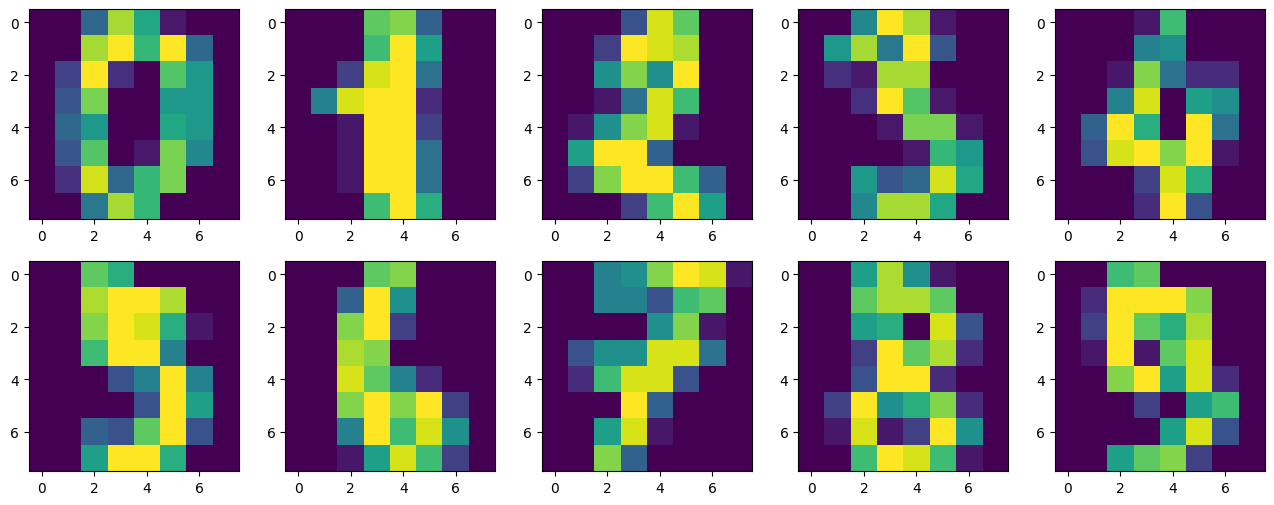

In [44]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]));

Projecting 64-dimensional data to 2D


<ipython-input-46-95083e7e3288>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


Text(0.5, 1.0, 'MNIST. PCA projection')

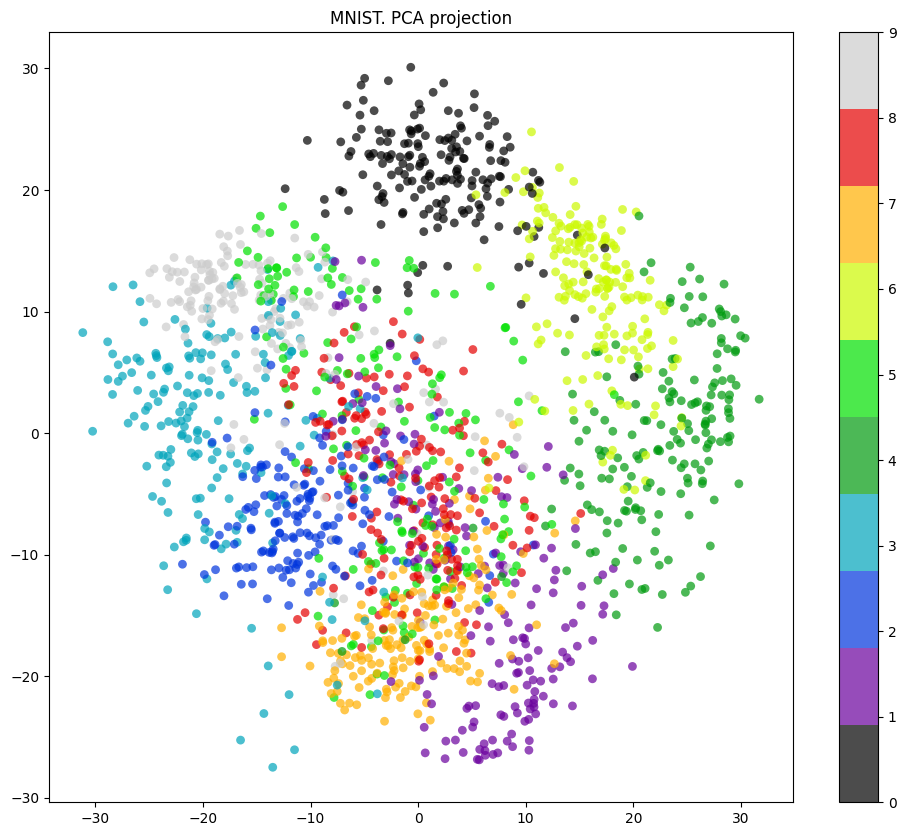

In [46]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection')

# t-sne

Нужно найти такое подпространство, которое будет минимизировать расстояние между вероятностным распределением в первоначальном пространстве P и пониженной размерности Q.\
D(K|L) = $\sum P_i * log(P_i/Q_i)$

далее решаем оптимизационную задачу, находя минимум функционала

<ipython-input-47-f95b0fbc421f>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


Text(0.5, 1.0, 'MNIST. t-SNE projection')

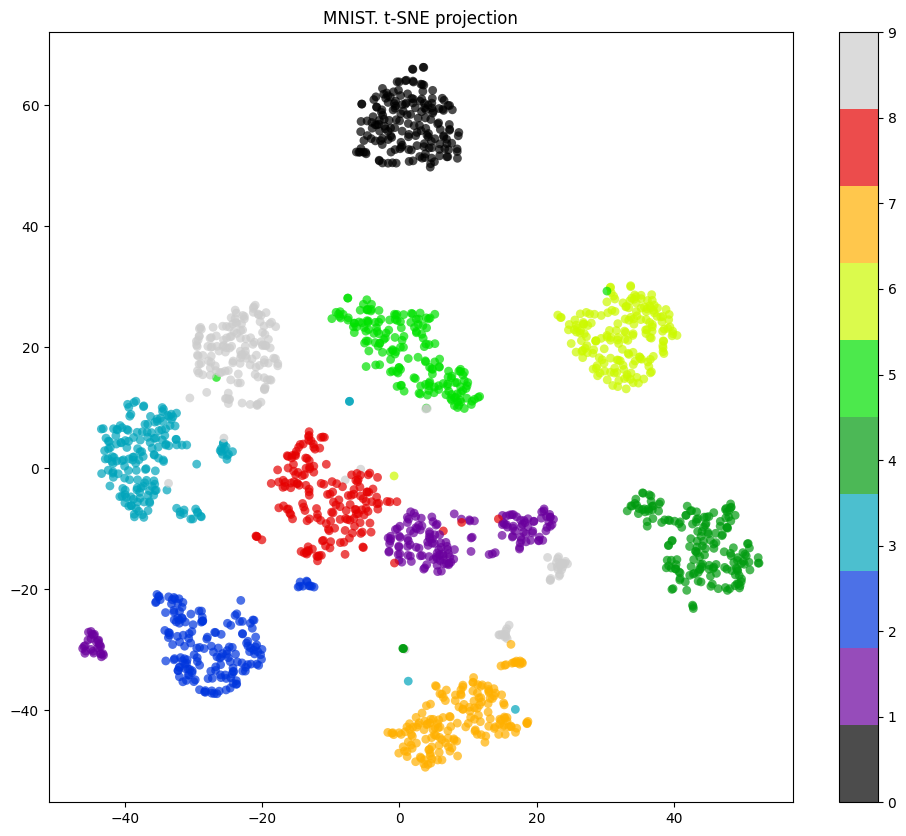

In [47]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=17)

X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y,
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. t-SNE projection')

# K-means

In [59]:
from tqdm import tqdm
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 50)

for k in tqdm(K):
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)

    distortions.append(np.mean(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)))
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_


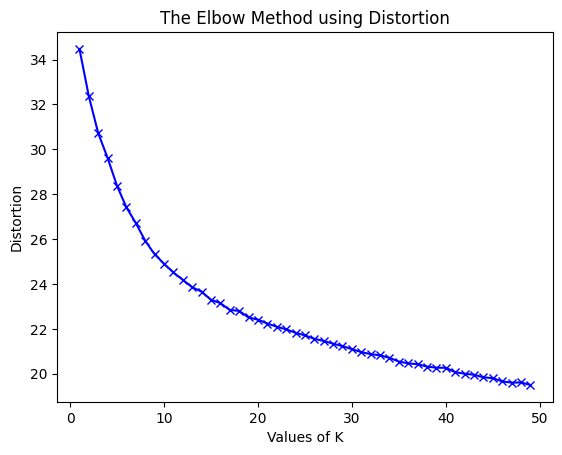

In [55]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

<ipython-input-58-4bb573a65b18>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


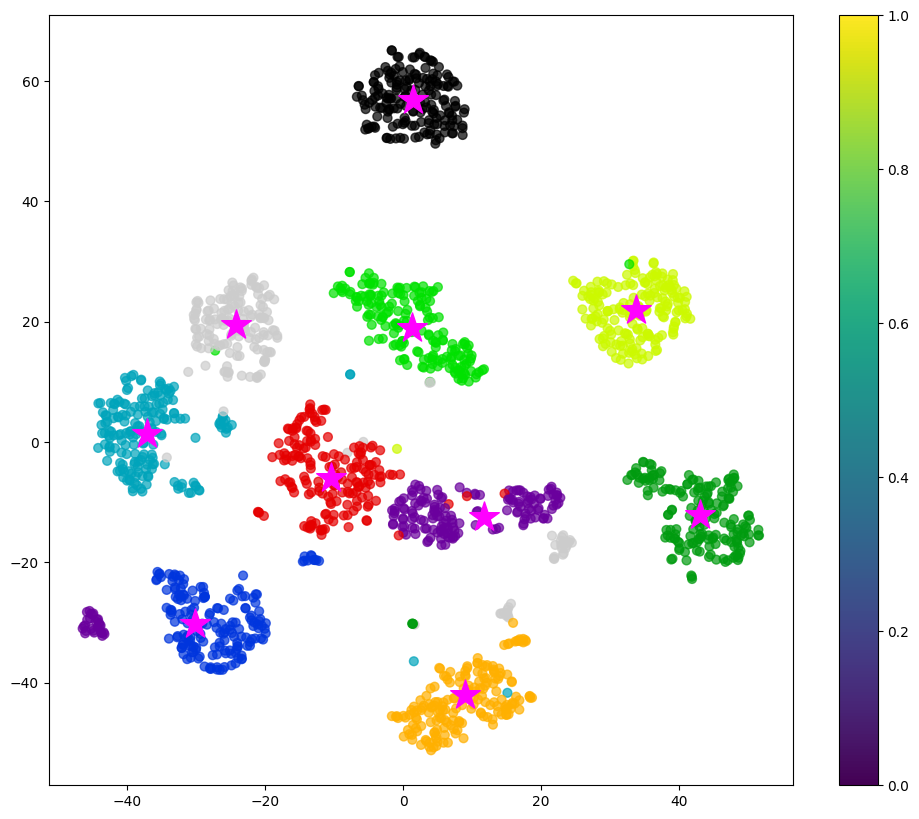

In [58]:
from sklearn.cluster import KMeans

tsne = TSNE()

X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
clusters = KMeans(n_clusters = 10, random_state = 67).fit(X_tsne)
plt.scatter(clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:, 1], s=500, color = 'fuchsia', marker='*')
plt.colorbar()